In [29]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from tparbressource import *
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Generate data
n=456
cl=int(n/4)
data = rand_checkers(n1=cl, n2=cl, n3=cl, n4=cl)

# No need for test / train splitting, for now we are only going to train
X = data[:,:2]
y = data[:,-1]

In [35]:
# Initialize results
res_g = []
res_e = []

# Depth parameter
max_depth = 25

for i in range(1,max_depth):
    # Create classifier
    clf_g = DecisionTreeClassifier(criterion='gini', max_depth=i)
    clf_e = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    # Train classifier
    clf_g.fit(X, y)
    clf_e.fit(X, y)
    # Computing accuracy score on the same data as before will give the percentage 
    # of errors on train data. Obviously error % is 1 - accuracy
    err_g = (1 - clf_g.score(X, y))
    err_e = (1 - clf_e.score(X, y))
    res_g.append(err_g)
    res_e.append(err_e)
    

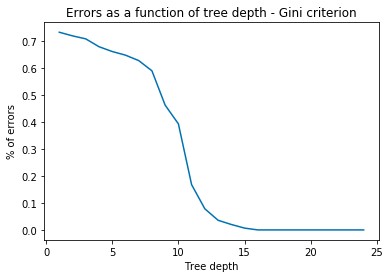

In [36]:
# Line plot instead of scatter was preferred
fig, ax = plt.subplots()
ax.set_title('Errors as a function of tree depth - Gini criterion')
ax.set_xlabel('Tree depth')
ax.set_ylabel('% of errors')
plt.plot(range(1, max_depth), np.array(res_g))

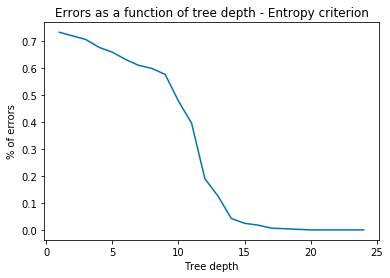

In [37]:
fig, ax = plt.subplots()
ax.set_title('Errors as a function of tree depth - Entropy criterion')
ax.set_xlabel('Tree depth')
ax.set_ylabel('% of errors')
plt.plot(range(1, max_depth), np.array(res_e))

In [38]:
# Depth minimizing error
depth_minerr = res_e.index(min(res_e)) + 1
depth_minerr

20

In [39]:
clf_minerr = DecisionTreeClassifier(criterion='entropy', max_depth=depth_minerr)
clf_minerr.fit(X, y)
clf_minerr.feature_importances_

array([0.48722649, 0.51277351])

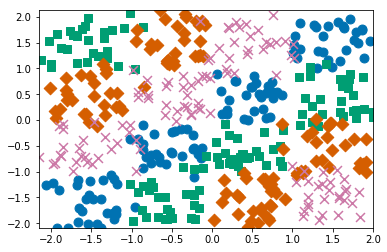

In [18]:
y=clf_minerr.predict(X)
plot_2d(X, y)

In [46]:
d = np.hstack((X, y[:, np.newaxis]))

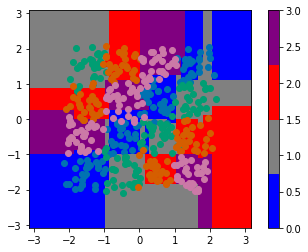

In [47]:
color_blind_list = sns.color_palette("colorblind", 4)

plt.figure()
frontiere(clf_minerr.predict, X)
for i in range(4):
    plt.scatter(d[d[:,2]==i, 0], d[d[:,2] == i, 1], c=color_blind_list[i])
plt.show()